 # Lecture 4:  Balance and Sequentiality in Bayesian Analyses 
 
 ## Instructor: Dr. Hu Chuan-Peng  


### Different priors, different posteriors

**贝克德尔测验(Bechdel test)**

衡量一部电影对女性角色的刻画是否扁平且单一的测验。

* 假设你是一位女性主义者，你认为当前电影对女性角色的展现是远远不够的，那么你可能认为只有少部分电影能通过这个测试。

* 假设你是乐观派，你可能认为大多数电影都能通过这个测试。

* 假设你只是吃瓜的，不太了解电影行业，你可能对大多数电影是否能通过这个测试没有明显的看法。


假设$\pi$是一个0-1之间的值，它代表了一部电影通过贝克德尔测试的可能性。我们可以看到这三种人对于$\pi$有着不同的信念，比如：

* 女性主义者认为少部分电影能通过测试，对$\pi$的估计更可能位于小于0.5的区域
* 乐观者认为大多数电影都能通过测试，对$\pi$的估计更可能接近1
* 吃瓜群众没有明显的偏好，那么$\pi$可以处于0-1的任何位置

这就构成了三种不同的先验，我们可以使用不同的Beta分布来表示。


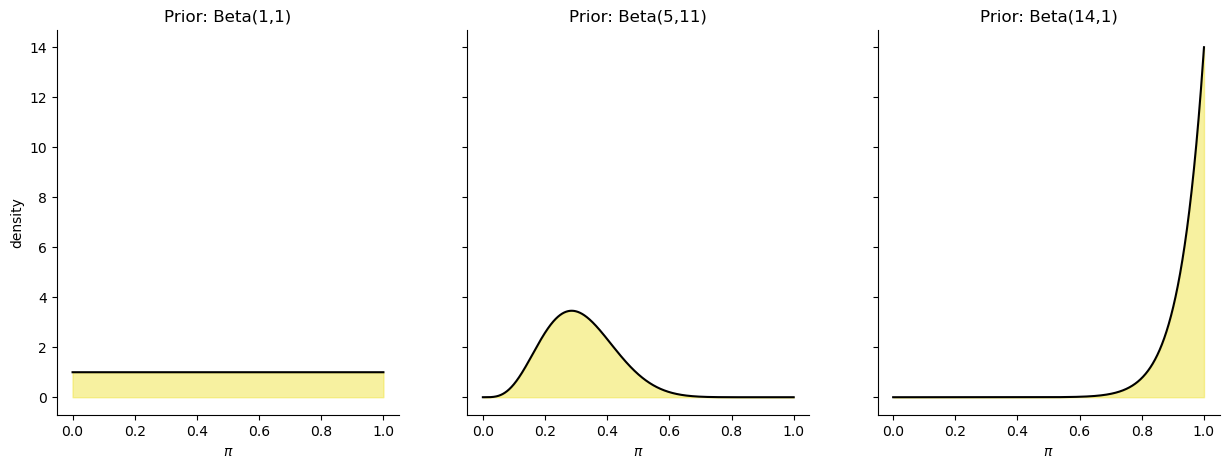

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import beta

params = [(1,1),(5,11),(14,1)]

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
x = np.linspace(0,1,10000)

for i,(alpha_,beta_) in enumerate(params):
    pdf_values = beta.pdf(x,alpha_,beta_)
    sns.lineplot(x=x,y=pdf_values,ax=axes[i],color="black")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    axes[i].set_title(f'Prior: Beta({alpha_},{beta_})')
    axes[i].set_xlabel('$\pi$')
    axes[i].set_ylabel('density')

sns.despine()



**不同类型的先验**

我们来回顾一下从先验中我们可以获得什么信息

* 在上图中，不同的先验，反映了人们对测试通过率的不同信念(认为$\pi$主要集中分布在哪里)

* 同时，先验分布的集中程度也反映了人们对某种信念的肯定程度

比如，对于$Beta(14,1)$这个先验，$\pi$的取值集中分布在0.8-1.0这种“高通过率区域”，说明乐观主义者的信念是很肯定的。

而对于$Beta(1,1)$这个先验，$\pi$的取值均匀分布在0-1之间，吃瓜群众觉得$\pi$取任何值的可能性都是一样的，换言之她们也不知道$\pi$可能是多少。

-------------------------

以上两种先验，可被总结为**信息型先验(informative prior)**和**模糊型先验(vague prior)**，其中：

* **信息型先验**：先验分布比较窄，可变范围小，说明此先验强烈，可以提供比较确定的信息，如$Beta(14,1)$

* **模糊型先验**：先验分布的可变范围大，无法提供确定的信息，如$Beta(1,1)$

**调查数据**

在继续探究不同的先验如何影响后验之前，我们还需要一些数据

假设现在随机抽取20部电影，并对这些电影进行测试，结果显示有9部电影可以通过测试

In [10]:
import pandas as pd
import numpy as np

bechdel = pd.read_csv("./data/bechdel.csv")

np.random.seed(84735)
bechdel_20 = bechdel.sample(n=20)

bechdel_20.head()

,year,title,binary
1690,1984,Gremlins,FAIL
283,2011,The Green Hornet,FAIL
1069,2003,Wrong Turn,PASS
784,2006,Quinceanera,PASS
1373,1998,Sliding Doors,PASS


In [11]:
bechdel_20['binary'].value_counts()

binary
FAIL    11
PASS     9
Name: count, dtype: int64

**beta-binomial组合**

在某一通过率$\pi$下，随机抽取20部电影，其中有9部电影通过的可能性，这个似然函数可以用二项分布来表示。

\begin{split}
Y | \pi & \sim \text{Bin}(n, \pi)
\end{split}  .

$$  
f(y|\pi) = P(Y=y | \pi) = \binom{20}{9} \pi^9 (1-\pi)^{11}  
$$  

------------------------

这里，我们的通过率$\pi$服从$Beta$分布，似然函数服从二项分布

\begin{split}
Y | \pi & \sim \text{Bin}(n, \pi)  \\
\pi & \sim \text{Beta}(\alpha, \beta) \\ 
\end{split}  .

从上一节我们知道，这种情况下的后验仍是beta分布，并且可以表示为：
$$
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$



**🤔 思考时间**

下图画出了三种先验-似然组合，

我们可以猜测一下，哪一种后验分布的形状和似然分布的形状最为类似：


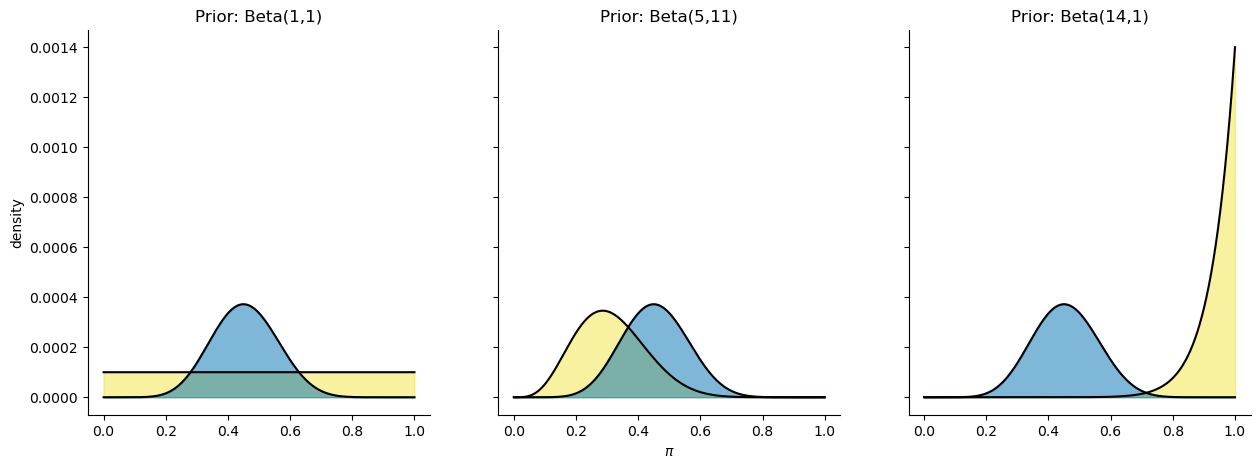

In [30]:
params = [(1,1),(5,11),(14,1)]

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
x = np.linspace(0,1,10000)
likelihood_value = st.binom.pmf(9,20,x)/np.sum(st.binom.pmf(9,20,x))

for i,(alpha_,beta_) in enumerate(params):  
    pdf_values = beta.pdf(x,alpha_,beta_)/np.sum(beta.pdf(x,alpha_,beta_))    
    axes[i].plot(x,pdf_values,color="black")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    axes[i].plot(x,likelihood_value,color="black")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)
    axes[i].set_title(f'Prior: Beta({alpha_},{beta_})')

axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')

sns.despine()

**后验图示**

我们可以使用公式来快速得到三种后验的表达式
$$
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

|Analyst|Prior  |Posterior  
|----|-----|----|  
|$\alpha$   |Beta(5,11)|Beta(14,22)|  
|$\beta$   |Beta(1,1)|Beta(10,12)|  
|mean   |Beta(14,1) |Beta(23,12)|  


然后，我们可以把这些分布画出来：
 

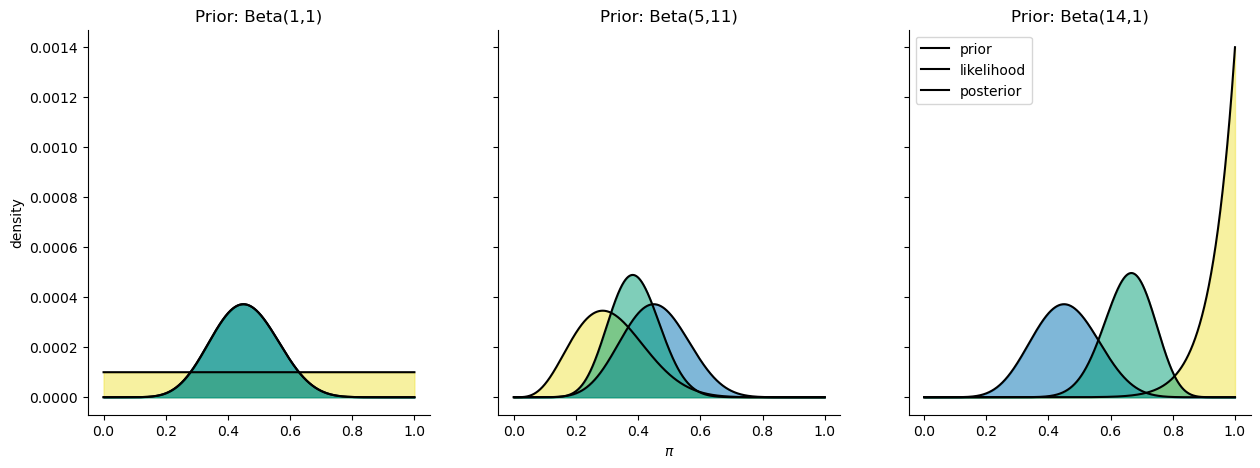

In [32]:
params = [(1,1),(5,11),(14,1)]

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
x = np.linspace(0,1,10000)

for i,(alpha_,beta_) in enumerate(params):
    
    likelihood_value = st.binom.pmf(9,20,x)
    pdf_values = beta.pdf(x,alpha_,beta_)/np.sum(beta.pdf(x,alpha_,beta_))
    posterior = pdf_values*likelihood_value

    posterior /= np.sum(posterior)
    likelihood_value /= np.sum(likelihood_value)

    
    axes[i].plot(x,pdf_values,color="black",label="prior")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    axes[i].plot(x,likelihood_value,color="black",label="likelihood")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)
    axes[i].plot(x,posterior,color="black",label="posterior")
    axes[i].fill_between(x, posterior, color="#009e74", alpha=0.5)

    axes[i].set_title(f'Prior: Beta({alpha_},{beta_})')

plt.legend()
axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')

sns.despine()

我们关注信息型先验和模糊型先验下的后验有什么区别：

* 在吃瓜群众这里，后验分布和似然分布重合了，这是因为她们的先验分布无法提供任何关于$\pi$的有效信息，因此对$\pi$的认知更新都来源于似然分布。

* 乐观主义者对$\pi$的后验估计仍集中于0.6-0.8的区域，因为她们一开始对$\pi$的信念是很强烈的（均值高，可变性小），所以只有45%的电影能够通过测试这一事件并未对她们的乐观信念产生较大影响。


### Different data, different posteriors

**不同的似然**

在看过乐观主义者的例子之后，你或许会想，当人们的先验认知过于主观时，客观数据难以对认知更新产生影响。

但并不是一直如此，通过贝叶斯公式我们知道，后验的分布主要取决于先验与似然

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  

接下来我们将看到，在强先验下，不同的似然对后验分布的影响。

------------------
-----------------


假设现在新增了三位调查员，小红、小蓝、小绿，她们都是乐观主义者，对$\pi$有着**共同的先验信念Beta(14,1)**，但在调查的过程中，她们接触到了**不同的数据**。


* 小红调查了1991年的13份电影，其中有6部(46%)通过了测试
* 小蓝调查了2000年的63份电影，其中有29部(46%)通过了测试
* 小绿调查了2013年的99份电影，其中有46部(46%)通过了测试


在这里，三位调查员调查的电影数量不同，但调查结果都是相似的46%

我们可以把三种似然函数写出来：
$$  
小红：
f(6|\pi) = \binom{13}{6} \pi^6 (1-\pi)^{7}  
$$  

$$  
小蓝：
f(29|\pi) = \binom{63}{29} \pi^{29} (1-\pi)^{34}  
$$  

$$  
小绿：
f(46|\pi) = \binom{99}{46} \pi^{46} (1-\pi)^{53}  
$$  


我们同样可以把三种不同的似然分布画出来：

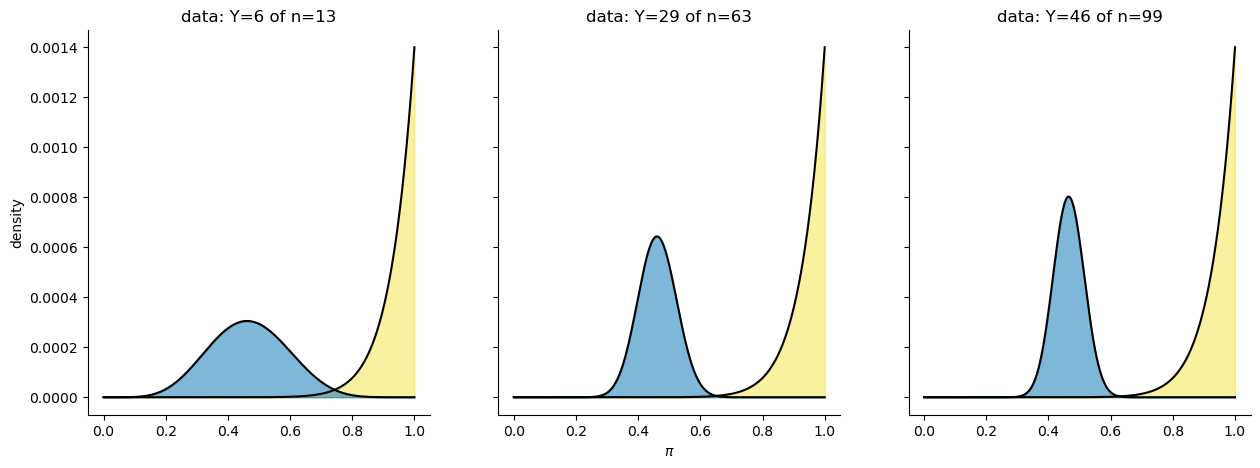

In [35]:
params = [(6,13),(29,63),(46,99)]

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
x = np.linspace(0,1,10000)
alpha_ = 14
beta_ = 1
pdf_values = beta.pdf(x,alpha_,beta_)/np.sum(beta.pdf(x,alpha_,beta_))

for i,(y,n) in enumerate(params):
    
    likelihood_value = st.binom.pmf(y,n,x)/np.sum(st.binom.pmf(y,n,x))

    axes[i].plot(x,pdf_values,color="black",label="prior")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    axes[i].plot(x,likelihood_value,color="black",label="likelihood")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)

    axes[i].set_title(f'data: Y={y} of n={n}')


axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')
sns.despine()

🤔思考时间：
谁的后验分布受到数据的影响更大？

我们可以发现，虽然三种似然分布的均值都是0.46，但是随着样本量增大，似然的分布越窄，反映的信息越集中。

*注意：在似然中，y轴为$f(y|\pi)$，表示在特定的$\pi$值下产生当前数据的相对可能性。*

* 在小红的似然函数中，“13部电影中有6部通过测试”的结果在$\pi$为0.15-0.75时，都有可能出现。

* 但在小绿的似然函数中，“99部电影中有46部通过测试”的结果只在$\pi$为0.35-0.55时，才有可能出现。

* 换言之，小绿的似然函数直接将pi的可能取值缩小到一个更小的范围


**当似然反映的信息越集中时，它对后验的影响越大**


-----------------------------

同样的，我们可以使用公式快速计算出后验beta分布中的参数，并画图

|Analyst|Data  |Posterior  
|----|-----|----|  
|red   |Y=6 of n=13|Beta(20,8)|  
|blue   |Y=29 of n=63|Beta(43,35)|  
|green   |Y=46 of n=99|Beta(60,54)|


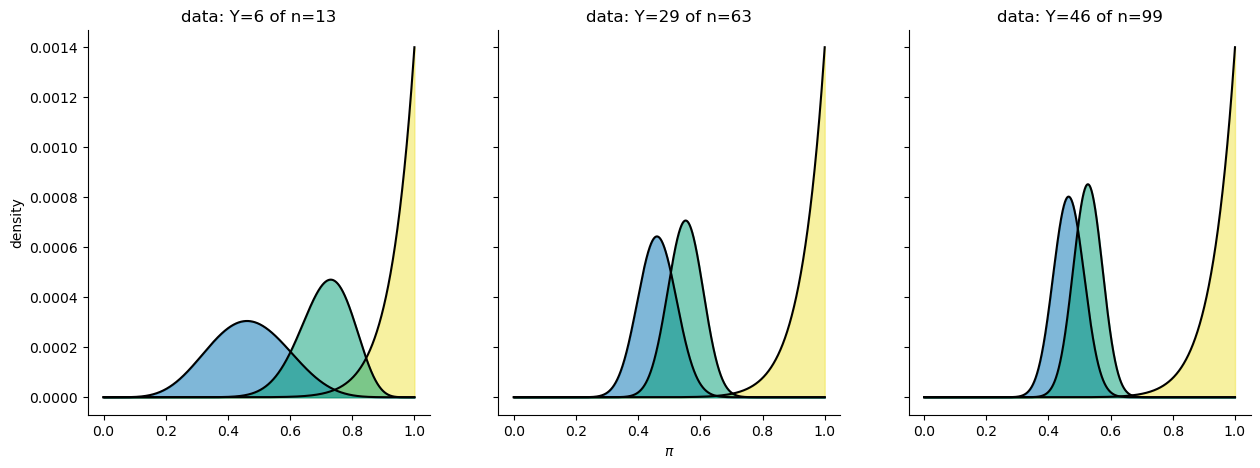

In [36]:
params = [(6,13),(29,63),(46,99)]

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
x = np.linspace(0,1,10000)
alpha_ = 14
beta_ = 1
pdf_values = beta.pdf(x,alpha_,beta_)

for i,(y,n) in enumerate(params):
    
    likelihood_value = st.binom.pmf(y,n,x)
    posterior = pdf_values*likelihood_value

    posterior /= np.sum(posterior)
    pdf_values /= np.sum(pdf_values)    
    likelihood_value /= np.sum(likelihood_value)


    axes[i].plot(x,pdf_values,color="black",label="prior")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    axes[i].plot(x,likelihood_value,color="black",label="likelihood")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)
    axes[i].plot(x,posterior,color="black",label="posterior")
    axes[i].fill_between(x, posterior, color="#009e74", alpha=0.5)

    axes[i].set_title(f'data: Y={y} of n={n}')


axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')
sns.despine()

### Striking a balance between the prior & data

我们已经看到不同的先验和不同的数据对后验分布的影响

**实际上，后验分布是两者间的平衡。**

![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/bechdel-combined-ch4-1.png)

(待补)

In [39]:
x = np.linspace(0,1,10000)

# Create a DataFrame to store the values of pi and the posterior distributions
df = pd.DataFrame({'pi': x})

# Define the likelihoods
likelihoods = [(6, 13), (29, 63), (46, 99)]

# Define the priors
priors = [(14, 1), (5, 11), (1, 1)]

# Calculate and store the posterior distributions for all combinations of likelihoods and priors
for lik_params in likelihoods:
    for prior_params in priors:
        lik_name = f'lik_{lik_params[0]}_{lik_params[1]}'
        prior_name = f'prior_{prior_params[0]}_{prior_params[1]}'
        posterior_name = f'posterior_{lik_params[0]}_{lik_params[1]}_{prior_params[0]}_{prior_params[1]}'
        
        # Calculate the likelihood
        df[lik_name] = df['pi'].apply(lambda x: st.binom.pmf(lik_params[0], lik_params[1], x))
        
        # Calculate the prior
        df[prior_name] = df['pi'].apply(lambda x: beta.pdf(x, prior_params[0], prior_params[1]))
        
        # Calculate the posterior by multiplying likelihood and prior
        df[posterior_name] = df[lik_name] * df[prior_name]

# Print the first few rows of the DataFrame
print(df.head())


       pi      lik_6_13    prior_14_1  posterior_6_13_14_1    prior_5_11  \
0  0.0000  0.000000e+00  0.000000e+00         0.000000e+00  0.000000e+00   
1  0.0001  1.715828e-21  1.401821e-51         2.405285e-72  1.500599e-12   
2  0.0002  1.097361e-19  1.148372e-47         1.260179e-66  2.398558e-11   
3  0.0003  1.249088e-18  2.234956e-45         2.791657e-63  1.213056e-10   
4  0.0004  7.013284e-18  9.407463e-44         6.597721e-61  3.830023e-10   

   posterior_6_13_5_11  prior_1_1  posterior_6_13_1_1     lik_29_63  \
0         0.000000e+00        1.0        0.000000e+00  0.000000e+00   
1         2.574771e-33        1.0        1.715828e-21  7.591301e-99   
2         2.632086e-30        1.0        1.097361e-19  4.061712e-90   
3         1.515214e-28        1.0        1.249088e-18  5.174620e-85   
4         2.686104e-27        1.0        7.013284e-18  2.165831e-81   

   posterior_29_63_14_1  posterior_29_63_5_11  posterior_29_63_1_1  \
0          0.000000e+00          0.000000e+00 

In [43]:
df.columns

Index(['pi', 'lik_6_13', 'prior_14_1', 'posterior_6_13_14_1', 'prior_5_11',
       'posterior_6_13_5_11', 'prior_1_1', 'posterior_6_13_1_1', 'lik_29_63',
       'posterior_29_63_14_1', 'posterior_29_63_5_11', 'posterior_29_63_1_1',
       'lik_46_99', 'posterior_46_99_14_1', 'posterior_46_99_5_11',
       'posterior_46_99_1_1'],
      dtype='object')

* 从左往右，数据的样本量从13增加到99，似然的分布越集中，对后验的影响也越来越大

* 从上往下，先验分布从信息型(informative prior)变为模糊型(vague prior)，先验分布对后验分布的影响也就越来越小

* 而最后一列告诉我们，无论三种人先验的差异有多大，只要数据提供的信息足够丰富，那么后验分布主要受到来自数据的影响，三种人的后验分布也并不会相差太大。

**练习**
修改参数，以观察不同的先验和数据对后验产生的影响

### Bonus 1：使用数学公式证明，后验确实利用了来自先验和似然两方面的信息